In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

exp_json = "./experiment-20260123.json"

methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

df = pd.read_json(exp_json)
df.to_pickle("experiment.pickle")
df.to_csv("experiment.csv")
#print("Experiment:")
#print(df)

In [11]:
df.head(1)

,method,year,radius,dist_weight,num_startpoints,execution_time,best_score,ind_time,avg_time,steps,total_crimes,seen_crimes,unique_crime_coords,pai
0,bruteforce,2018,50,0.0,108.0,0.306,35.0,NaN,NaN,108,503,35,2,0.813987


In [ ]:
df2 = pd.DataFrame()
methods=['bruteforce', 'hillclimb', 'buildingwalk', 'dfs']
radius=[50, 100, 150, 200]
dist_weight=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

for method in methods:
  for r in radius:
    for dw in dist_weight:
      top_10 = df[
          (df['method'] == method) & 
          (df['radius'] == r) & 
          (df['dist_weight'] == dw)
      ].nlargest(10, 'pai')
      df2 = pd.concat([df2, top_10], ignore_index=True)



,method,year,radius,dist_weight,num_startpoints,execution_time,best_score,ind_time,avg_time,steps,total_crimes,seen_crimes,unique_crime_coords,pai
790,dfs,2020,200,1.0,10.0,1.51205,83.979158,1.05416,1.20646,21,247,230,4,357.844572
791,dfs,2018,200,1.0,10.0,1.52943,178.723169,0.96080,1.27104,21,612,516,8,219.530457
792,dfs,2018,200,1.0,10.0,2.13963,18.815975,1.68078,1.73875,21,273,35,4,89.775953
793,dfs,2019,200,1.0,10.0,3.25189,9.120925,2.31097,2.67055,21,239,59,7,26.767089
794,dfs,2019,200,1.0,10.0,2.77112,7.217394,2.01502,2.23943,21,249,58,6,25.686596
795,dfs,2018,200,1.0,10.0,3.28013,64.673242,2.88626,2.48423,21,685,211,11,22.019268
796,dfs,2018,200,1.0,10.0,3.12102,73.052209,2.55368,2.62677,21,697,231,14,21.989914
797,dfs,2018,200,1.0,10.0,3.23283,132.571607,2.73139,2.35731,21,714,213,12,20.851662
798,dfs,2019,200,1.0,10.0,1.59475,8.214403,1.07877,1.27576,21,233,202,6,20.826972
799,dfs,2018,200,1.0,10.0,3.20821,52.056336,2.75542,2.41689,21,810,220,12,19.603653


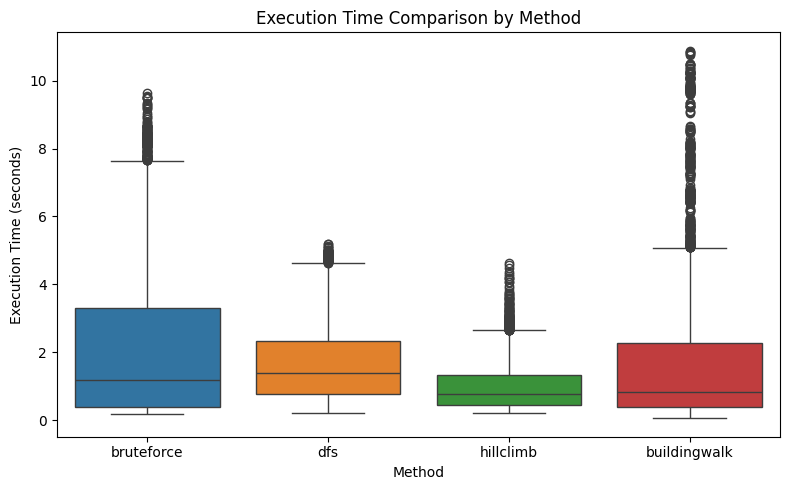

In [33]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x="method",
    y="execution_time",
    order=methods,
    hue="method",
    hue_order=methods,
)

plt.xlabel("Method")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison by Method")

plt.tight_layout()
plt.show()


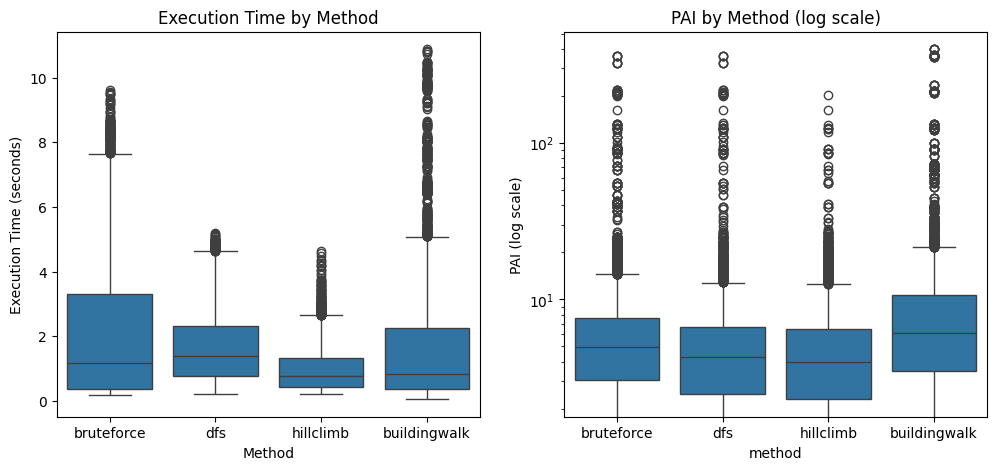

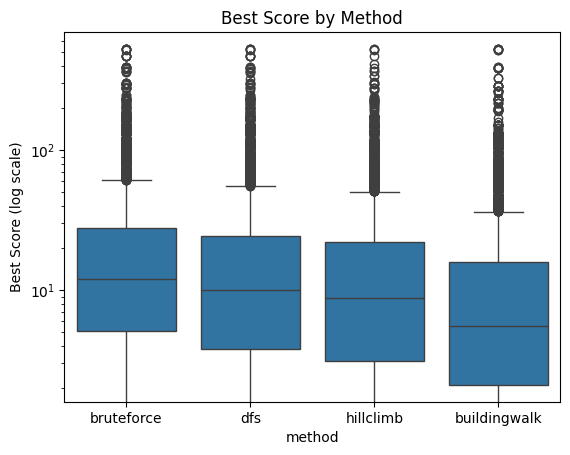

In [13]:
methods = ["bruteforce", "dfs", "hillclimb", "buildingwalk"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Execution time
sns.boxplot(
    data=df,
    x="method",
    y="execution_time",
    order=methods,
    ax=axes[0]
)
axes[0].set_title("Execution Time by Method")
axes[0].set_xlabel("Method")
axes[0].set_ylabel("Execution Time (seconds)")

# PAI
sns.boxplot(
    data=df,
    x="method",
    y="pai",
    order=["bruteforce", "dfs", "hillclimb", "buildingwalk"]
)

plt.yscale("log")
plt.ylabel("PAI (log scale)")
plt.title("PAI by Method (log scale)")
plt.show()

sns.boxplot(
    data=df,
    x="method",
    y="best_score",
    order=["bruteforce", "dfs", "hillclimb", "buildingwalk"]
)

plt.yscale("log")
plt.ylabel("Best Score (log scale)")
plt.title("Best Score by Method")
plt.show()

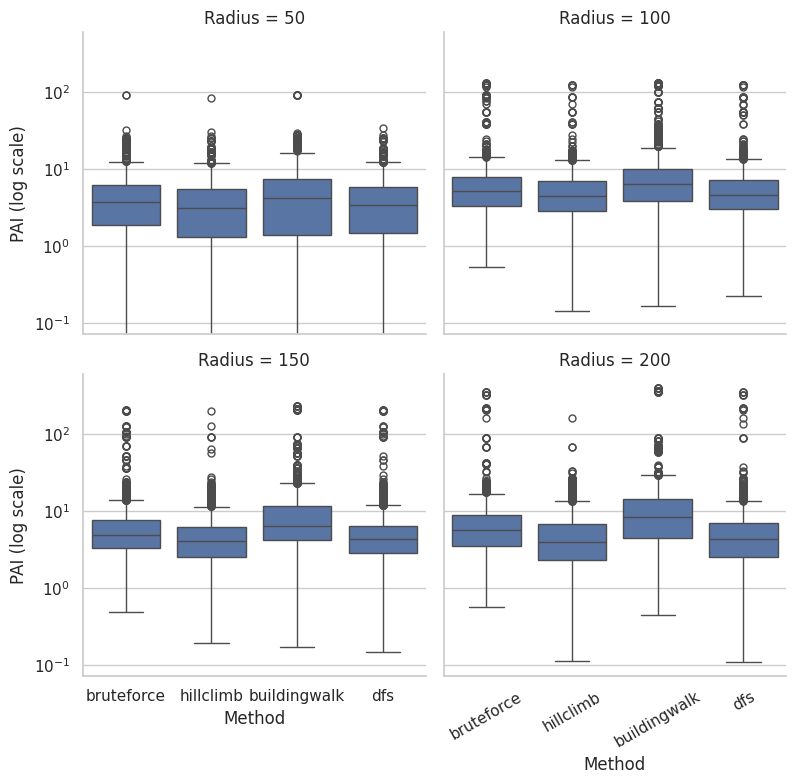

In [52]:
# PAI, One for each method
sns.set(style="whitegrid")

g = sns.catplot(
    data=df,
    x="method",
    y="pai",
    col="radius",
    kind="box",
    col_wrap=2,
    height=4,
    sharey=True
)

g.set(yscale="log")
g.set_titles("Radius = {col_name}")
g.set_axis_labels("Method", "PAI (log scale)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

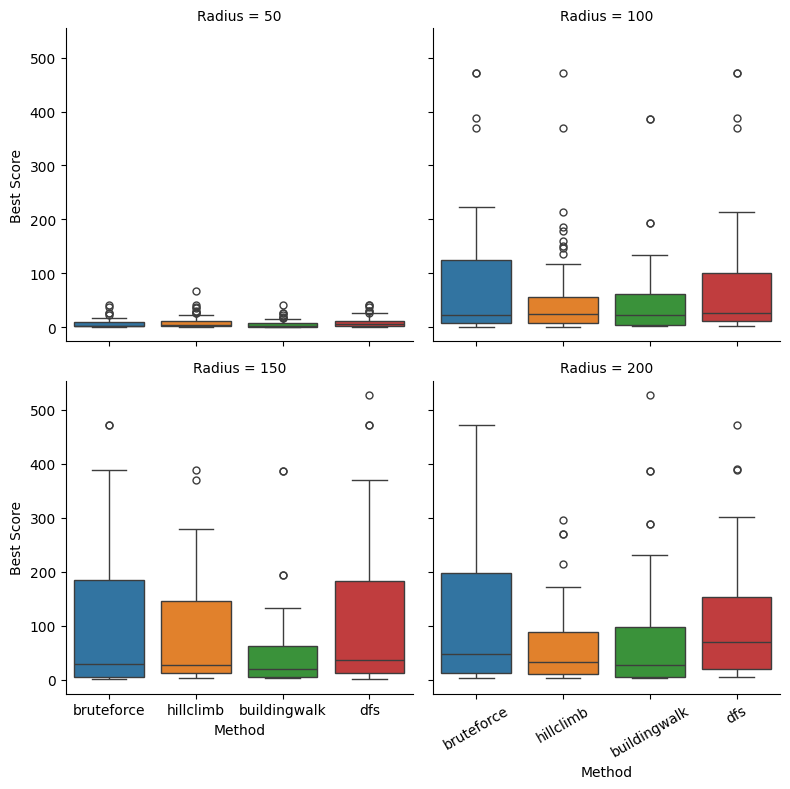

In [29]:
# Best score, one for eahc method
g = sns.catplot(
    data=df2,
    hue="method",
    x="method",
    y="best_score",
    col="radius",
    kind="box",
    col_wrap=2,
    height=4,
    sharey=True
)

# g.set(yscale="log")
g.set_titles("Radius = {col_name}")
g.set_axis_labels("Method", "Best Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

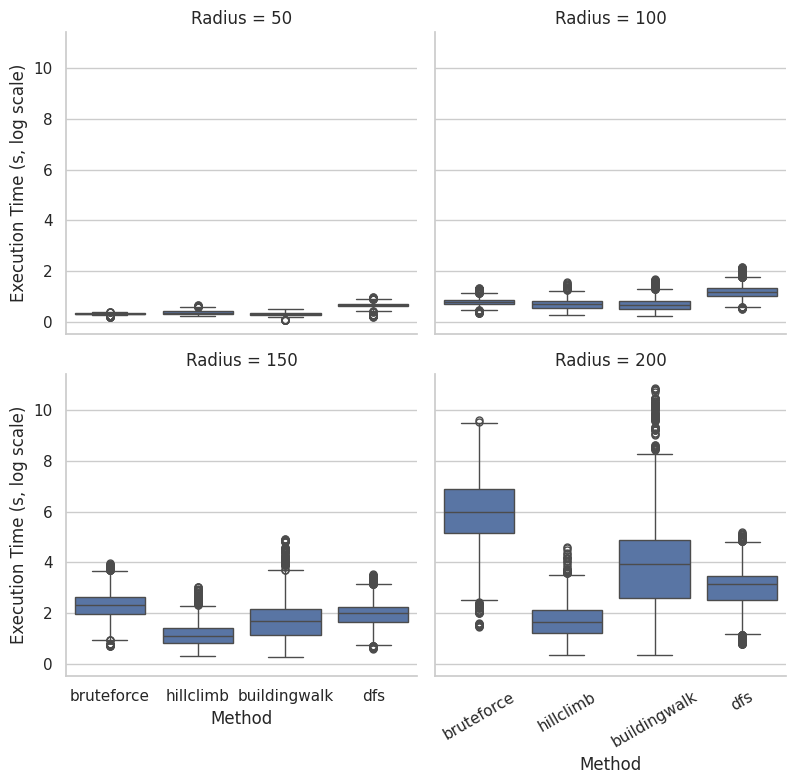

In [54]:
# Executio time, for all methods

g = sns.catplot(
    data=df,
    x="method",
    y="execution_time",
    col="radius",
    kind="box",
    col_wrap=2,
    height=4,
    sharey=True
)

# g.set(yscale="log")
g.set_titles("Radius = {col_name}")
g.set_axis_labels("Method", "Execution Time (s, log scale)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [25]:
# pai_pivot_median = df.pivot_table(
#     values="pai",
#     index=["dist_weight", "method"],
#     columns="radius",
#     aggfunc="median"
# )

# pai_pivot_median

df2 = df2.dropna(subset=["pai"])

pai_stats = df2.pivot_table(
    values="pai",
    index=["dist_weight", "method"],
    columns="radius",
    aggfunc=["mean", "std"]
)

pai_stats

mean                                     \
radius                          50         100         150         200   
dist_weight method                                                       
0.0         bruteforce    29.718665  24.687465   23.690227   22.103795   
            buildingwalk  30.280950  24.973410   27.165993   27.618028   
            dfs           19.844923  21.652965   19.163505   22.461467   
            hillclimb     24.709007  17.631312   23.093484   20.867073   
0.2         bruteforce    27.802535  68.838157   79.635144  103.998986   
            buildingwalk  29.257098  94.394654  122.017460  168.022187   
            dfs           16.253141  50.468876   74.774208   67.711915   
            hillclimb     16.766891  40.489234   18.750593   38.332717   
0.4         bruteforce    19.410793  86.022353   97.495691  141.189225   
            buildingwalk  29.283992  97.139547  127.018288  191.616417   
            dfs           18.520146  53.542578   76.115153  105.368682   
            hillclimb     17.345213  33.491300   56.145069   20.795574   
0.8         bruteforce    19.410793  79.991760   97.365617  140.361872   
            buildingwalk  29.283992  97.139547  129.327016  192.439652   
            dfs           18.520146  56.431760   84.373388   78.840942   
            hillclimb     16.294951  35.554349   26.098346   27.776647   
1.0         bruteforce    19.410793  79.991760   97.365617  140.637605   
            buildingwalk  29.283992  97.139547  129.327016  192.439652   
            dfs           14.109903  52.784926   79.998465   82.489614   
            hillclimb     15.864383  39.512327   26.069415   27.835462   

                                std                                    
radius                          50         100        150         200  
dist_weight method                                                     
0.0         bruteforce    22.716225   8.350865   7.500451    4.781899  
            buildingwalk  22.022762   2.105408   7.081140    6.107920  
            dfs            6.969796   6.550348   7.330976    7.364371  
            hillclimb     22.079581   4.177211  15.109889    3.001036  
0.2         bruteforce    23.083948  29.388539  54.219974   84.410454  
            buildingwalk  22.178435  38.860293  84.567088  174.140648  
            dfs            3.351008  37.825747  58.365860   71.605840  
            hillclimb      3.527703  37.897644   2.560411   44.030519  
0.4         bruteforce     4.187241  33.853637  66.127366  126.642900  
            buildingwalk  22.168952  34.482890  80.065910  153.604641  
            dfs            4.581641  43.659412  75.908889  138.645120  
            hillclimb      4.347781  34.304438  64.806790    1.791610  
0.8         bruteforce     4.187241  40.192032  66.288607  127.457835  
            buildingwalk  22.168952  34.482890  77.516927  152.861728  
            dfs            4.581641  42.801513  76.938942  106.456219  
            hillclimb      3.338953  34.850403  23.200826   14.583983  
1.0         bruteforce     4.187241  40.192032  66.288607  127.180841  
            buildingwalk  22.168952  34.482890  77.516927  152.861728  
            dfs            2.313457  44.280173  77.921308  115.401838  
            hillclimb      3.702973  37.272511  23.243297   14.484858

In [31]:
df["area_fraction"] = df["seen_crimes"] / df["total_crimes"] / df["pai"]
df["area_fraction"]

0        0.085484
1        0.067612
2        0.056873
3             NaN
4        0.085484
           ...   
28795    0.041924
28796    0.041924
28797    0.061152
28798    0.033305
28799    0.041924
Name: area_fraction, Length: 28800, dtype: float64

In [26]:
pai_stats_flat = pai_stats.copy()
pai_stats_flat.columns = ['{}_{}'.format(stat, radius) for stat, radius in pai_stats_flat.columns]
pai_stats_flat.reset_index(inplace=True)

# Convert to LaTeX
latex_code = pai_stats_flat.to_latex(
    index=False,           # don't include pandas index
    float_format="%.3f",   # format floats
    caption="PAI Statistics by Method and Distance Weight",
    label="tab:pai_stats",
    column_format='llcccc' # adjust based on number of columns
)

print(latex_code)

\begin{table}
\caption{PAI Statistics by Method and Distance Weight}
\label{tab:pai_stats}
\begin{tabular}{llcccc}
\toprule
dist_weight & method & mean_50 & mean_100 & mean_150 & mean_200 & std_50 & std_100 & std_150 & std_200 \\
\midrule
0.000 & bruteforce & 29.719 & 24.687 & 23.690 & 22.104 & 22.716 & 8.351 & 7.500 & 4.782 \\
0.000 & buildingwalk & 30.281 & 24.973 & 27.166 & 27.618 & 22.023 & 2.105 & 7.081 & 6.108 \\
0.000 & dfs & 19.845 & 21.653 & 19.164 & 22.461 & 6.970 & 6.550 & 7.331 & 7.364 \\
0.000 & hillclimb & 24.709 & 17.631 & 23.093 & 20.867 & 22.080 & 4.177 & 15.110 & 3.001 \\
0.200 & bruteforce & 27.803 & 68.838 & 79.635 & 103.999 & 23.084 & 29.389 & 54.220 & 84.410 \\
0.200 & buildingwalk & 29.257 & 94.395 & 122.017 & 168.022 & 22.178 & 38.860 & 84.567 & 174.141 \\
0.200 & dfs & 16.253 & 50.469 & 74.774 & 67.712 & 3.351 & 37.826 & 58.366 & 71.606 \\
0.200 & hillclimb & 16.767 & 40.489 & 18.751 & 38.333 & 3.528 & 37.898 & 2.560 & 44.031 \\
0.400 & bruteforce & 19.411 & 86

In [27]:
# Combine mean and std into a single column for each radius
pai_stats_combined = pai_stats.copy()

combined_cols = {}
for radius in pai_stats.columns.levels[1]:
    mean_col = ('mean', radius)
    std_col = ('std', radius)
    # convert radius to string for assign
    combined_cols[str(radius)] = pai_stats[mean_col].round(2).astype(str) + " ± " + pai_stats[std_col].round(2).astype(str)

# Assign new columns
pai_stats_table = pai_stats_combined.assign(**combined_cols)

# Keep only combined columns for display
display_cols = ["50", "100", "150", "200"]
pai_stats_table = pai_stats_table[display_cols].copy()
pai_stats_table = pai_stats_table.reset_index()  # bring index into columns

# Convert to LaTeX
latex_code = pai_stats_table.to_latex(
    index=False,
    caption="PAI Statistics (mean ± std) by Method and Distance Weight",
    label="tab:pai_stats_combined",
    column_format='llcccc',
    escape=False
)

print(latex_code)


\begin{table}
\caption{PAI Statistics (mean ± std) by Method and Distance Weight}
\label{tab:pai_stats_combined}
\begin{tabular}{llcccc}
\toprule
dist_weight & method & 50 & 100 & 150 & 200 \\
 &  &  &  &  &  \\
\midrule
0.000000 & bruteforce & 29.72 ± 22.72 & 24.69 ± 8.35 & 23.69 ± 7.5 & 22.1 ± 4.78 \\
0.000000 & buildingwalk & 30.28 ± 22.02 & 24.97 ± 2.11 & 27.17 ± 7.08 & 27.62 ± 6.11 \\
0.000000 & dfs & 19.84 ± 6.97 & 21.65 ± 6.55 & 19.16 ± 7.33 & 22.46 ± 7.36 \\
0.000000 & hillclimb & 24.71 ± 22.08 & 17.63 ± 4.18 & 23.09 ± 15.11 & 20.87 ± 3.0 \\
0.200000 & bruteforce & 27.8 ± 23.08 & 68.84 ± 29.39 & 79.64 ± 54.22 & 104.0 ± 84.41 \\
0.200000 & buildingwalk & 29.26 ± 22.18 & 94.39 ± 38.86 & 122.02 ± 84.57 & 168.02 ± 174.14 \\
0.200000 & dfs & 16.25 ± 3.35 & 50.47 ± 37.83 & 74.77 ± 58.37 & 67.71 ± 71.61 \\
0.200000 & hillclimb & 16.77 ± 3.53 & 40.49 ± 37.9 & 18.75 ± 2.56 & 38.33 ± 44.03 \\
0.400000 & bruteforce & 19.41 ± 4.19 & 86.02 ± 33.85 & 97.5 ± 66.13 & 141.19 ± 126.64 \\
0.40000

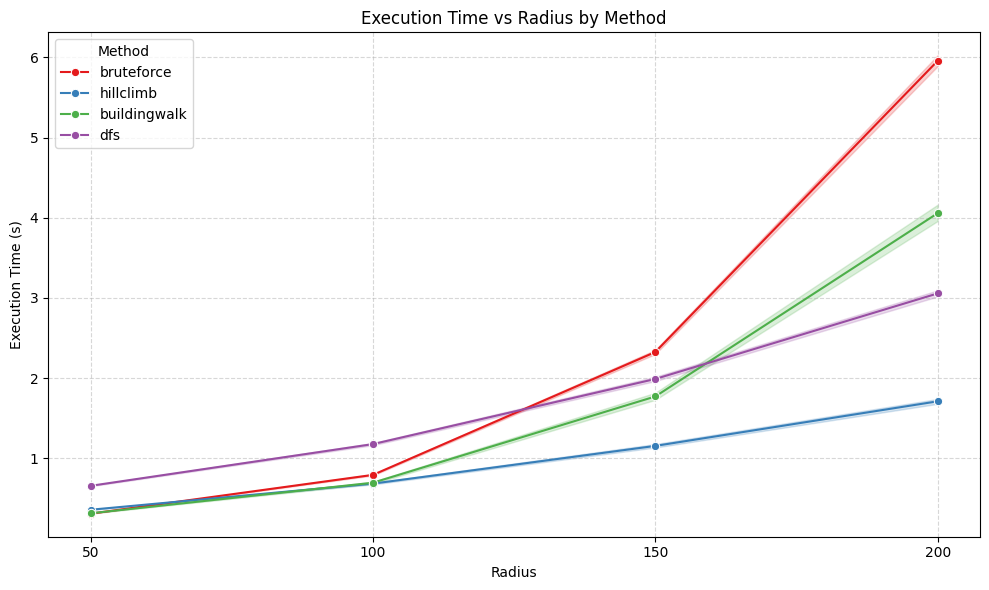

In [28]:
df2['radius'] = df2['radius'].astype(int)

plt.figure(figsize=(10, 6))

# Line plot: x = radius, y = execution time, hue = method
sns.lineplot(
    x='radius',
    y='execution_time',
    hue='method',
    data=df,
    marker='o',    # shows points
    palette='Set1',
    # err_style='band',  # optional: show confidence interval as band
    # errorbar='sd'            # optional: show standard deviation
)

plt.xlabel("Radius")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs Radius by Method")
# plt.yscale('log')  # optional if values differ a lot
plt.xticks([50, 100, 150, 200])
plt.legend(title="Method")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('exec_time_by_radius.png')
plt.show()

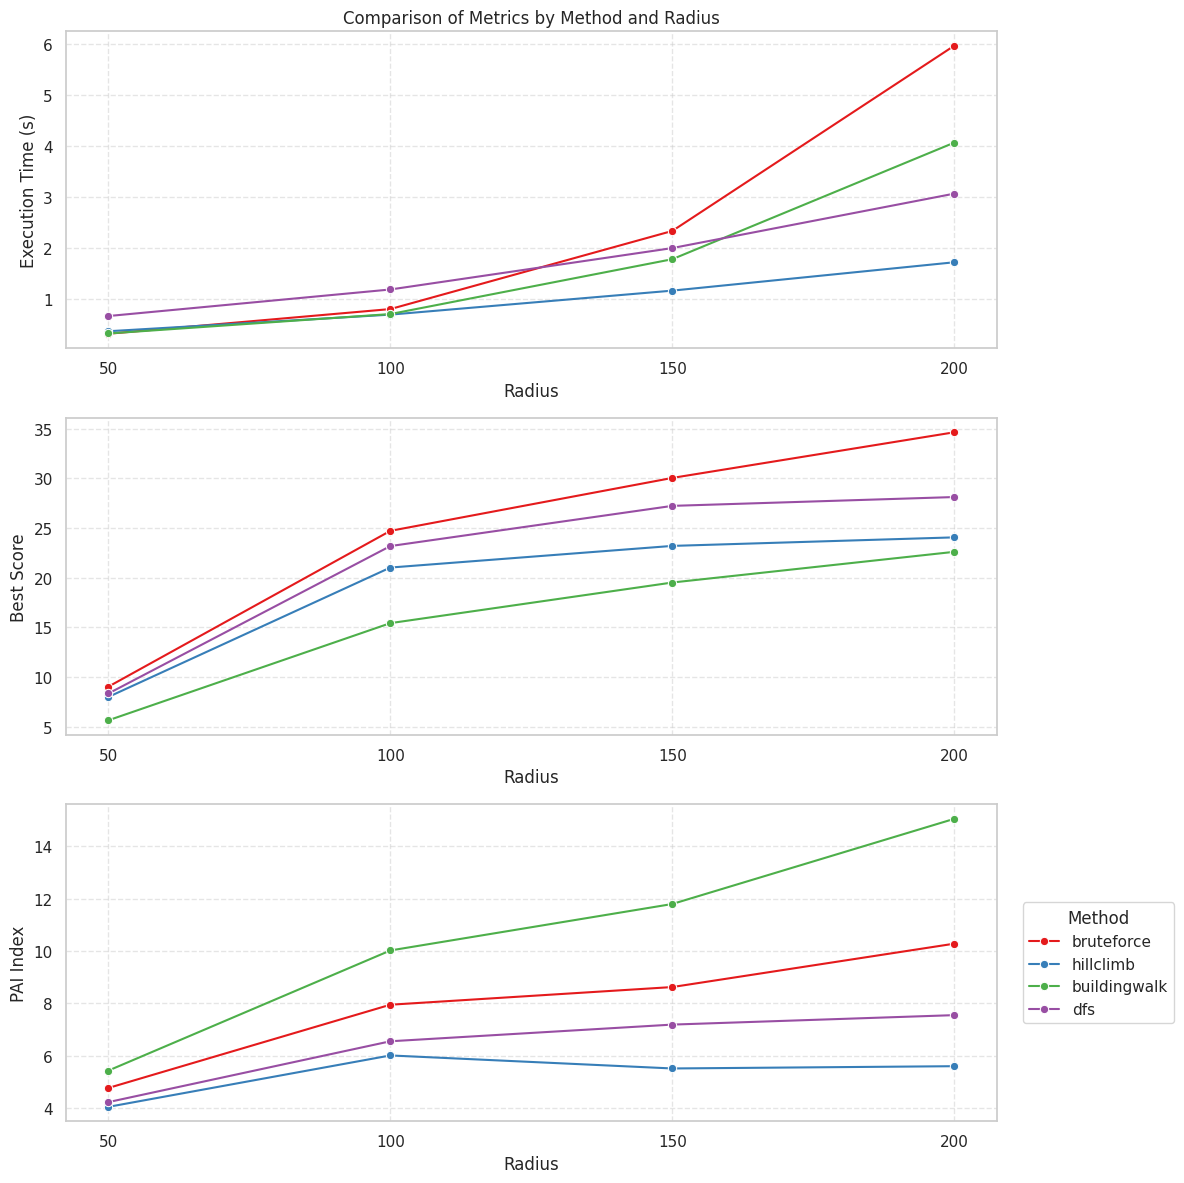

In [49]:
df['radius'] = df['radius'].astype(int)

metrics = ['execution_time', 'best_score', 'pai']
ylabels = ['Execution Time (s)', 'Best Score', 'PAI Index']

plt.figure(figsize=(12, 12))

for i, metric in enumerate(metrics, 1):
    ax = plt.subplot(3, 1, i)
    
    sns.lineplot(
        x='radius',
        y=metric,
        hue='method',
        data=df,
        marker='o',
        errorbar=None,
        palette='Set1'
    )
    
    ax.set_xlabel("Radius")
    ax.set_ylabel(ylabels[i-1])
    ax.set_xticks([50, 100, 150, 200])
    ax.grid(True, linestyle='--', alpha=0.5)
    if i == 1:
        ax.set_title("Comparison of Metrics by Method and Radius")
    if i < 3:
        ax.get_legend().remove()  # only show legend on last plot

plt.legend(title='Method', bbox_to_anchor=(1.02, 0.5), loc='center left')
plt.tight_layout()
plt.savefig('lines-all-metrics.png')
plt.show()